In [1]:
import numpy as np


In [2]:
x = np.linspace(0.0, 1.0, 11)

In [3]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [4]:
y = 3 * x + 2

In [5]:
y

array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ])

In [8]:
noise = np.random.random(11) * 3

In [9]:
noise

array([2.10171047, 2.2092567 , 0.880469  , 2.32929501, 2.41160328,
       0.05312229, 0.85533556, 2.31405258, 1.91367671, 0.77948911,
       0.20815424])

In [10]:
ynoise = y + noise

In [11]:
ynoise

array([4.10171047, 4.5092567 , 3.480469  , 5.22929501, 5.61160328,
       3.55312229, 4.65533556, 6.41405258, 6.31367671, 5.47948911,
       5.20815424])

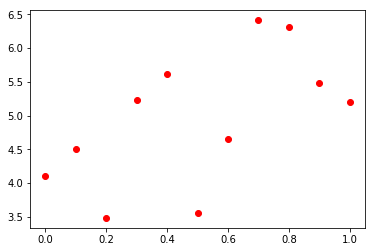

In [15]:
from matplotlib import pyplot as plt
plt.plot(x, ynoise, 'ro')
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
X = x.reshape((-1, 1))

In [18]:
x.shape, X.shape

((11,), (11, 1))

In [19]:
m = LinearRegression()

In [21]:
m.fit(X, ynoise)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
m.score(X, ynoise)

0.3403498614844952

In [23]:
yp = m.predict([[42.0]])

In [24]:
yp

array([77.87145041])

In [26]:
yp = m.predict(X)

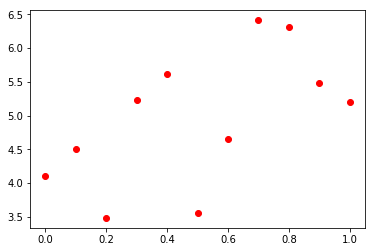

In [27]:
plt.plot(X, ynoise, 'ro')

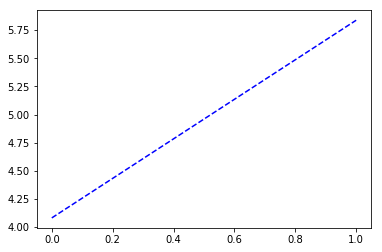

In [30]:
plt.plot(X, yp, 'b--')

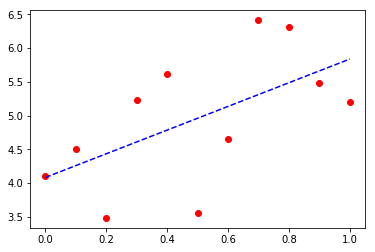

In [29]:
plt.plot(X, ynoise, 'ro')
plt.plot(X, yp, 'b--')
plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
Xpoly = PolynomialFeatures(degree=5).fit_transform(X)

In [38]:
Xpoly.shape

(11, 6)

In [39]:
m = LinearRegression()

In [40]:
m.fit(Xpoly, ynoise)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
m.score(Xpoly, ynoise)

0.4673634837953243

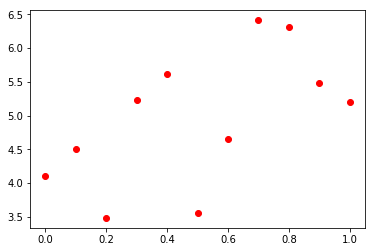

In [42]:
plt.plot(X, ynoise, 'ro')

In [43]:
yp = m.predict(Xpoly)

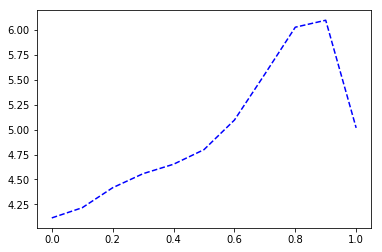

In [44]:
plt.plot(X, yp, 'b--')

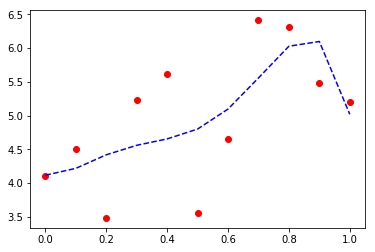

In [45]:
plt.plot(X, ynoise, 'ro')
plt.plot(X, yp, 'b--')

In [46]:
Xpoly = PolynomialFeatures(degree=10).fit_transform(X)

In [47]:
m = LinearRegression()

In [48]:
m.fit(Xpoly, ynoise)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
m.score(Xpoly, ynoise)

1.0

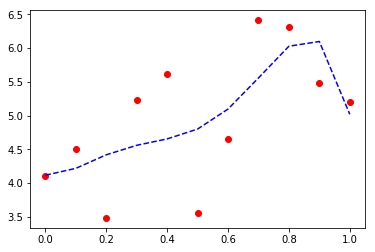

In [50]:
plt.plot(X, ynoise, 'ro')
plt.plot(X, yp, 'b--')

# REGULARIZATION

In [59]:
from sklearn.linear_model import Ridge

In [60]:
m = Ridge(alpha=10.0)

In [61]:
m.fit(Xpoly, ynoise)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [68]:
yp = m.predict(Xpoly, ynoise)


TypeError: predict() takes 2 positional arguments but 3 were given

In [69]:
yp = m.predict(Xpoly)

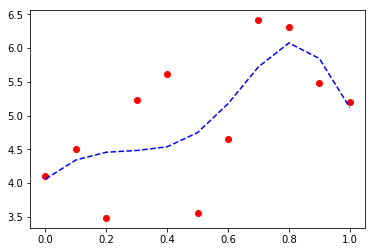

In [70]:
plt.plot(X, ynoise, 'ro')
plt.plot(X, yp, 'b--')
plt.show()

In [64]:
m = Ridge(alpha=0.0001).fit(Xpoly, ynoise)

In [65]:
yp = m.predict(Xpoly)

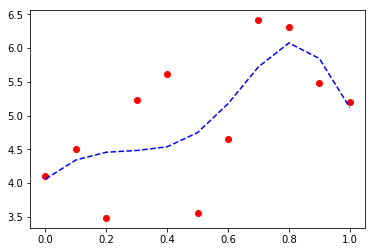

In [66]:
plt.plot(X, ynoise, 'ro')
plt.plot(X, yp, 'b--')
plt.show()

In [71]:
m.coef_

array([  0.        ,   3.80057529,  -9.99909268,   1.14300252,
        16.18358709,  11.9801564 ,  -3.41080986, -16.18613257,
       -17.70686118,  -5.18719525,  20.44488668])

In [73]:
m = Ridge(alpha=0.0).fit(Xpoly, ynoise)

In [74]:
# jus to check super high coef numbers with alpha 0.0
m.coef_

array([ 0.00000000e+00, -3.45202567e+02,  1.02897655e+04, -1.19947376e+05,
        7.29466935e+05, -2.59321756e+06,  5.67706105e+06, -7.75580971e+06,
        6.44476944e+06, -2.98096662e+06,  5.88700376e+05])

# LASSO REGULARIZATION


In [75]:
from sklearn.linear_model import Lasso

In [76]:
m = Lasso(alpha=10.0).fit(Xpoly, ynoise)

In [77]:
yp = m.predict(Xpoly)

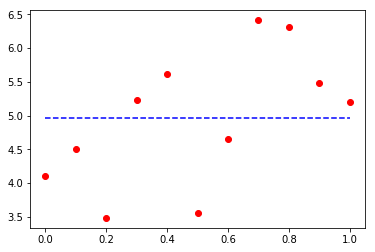

In [80]:
plt.plot(X, ynoise, 'ro')
plt.plot(X, yp, 'b--')
plt.show()

In [84]:
m.coef_

array([ 0.        ,  0.58807202,  0.        ,  3.40671927,  0.        ,
        0.        , -0.        , -0.        , -1.50057255, -1.56044942,
       -0.        ])

In [81]:
m = Lasso(alpha=0.001).fit(Xpoly, ynoise)

C:\Users\Pippo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [82]:
yp = m.predict(Xpoly)

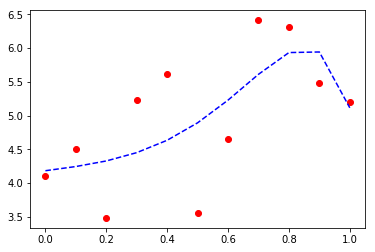

In [83]:
plt.plot(X, ynoise, 'ro')
plt.plot(X, yp, 'b--')
plt.show()

In [85]:
m.coef_

array([ 0.        ,  0.58807202,  0.        ,  3.40671927,  0.        ,
        0.        , -0.        , -0.        , -1.50057255, -1.56044942,
       -0.        ])

In [86]:
m = Lasso(alpha=0.0005).fit(Xpoly, ynoise)

C:\Users\Pippo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [87]:
m.coef_

array([ 0.        ,  0.54144365,  0.        ,  2.79693633,  1.4389673 ,
        0.        , -0.        , -1.17601856, -2.43773331, -0.24978453,
       -0.        ])

In [88]:
yp = m.predict(Xpoly)

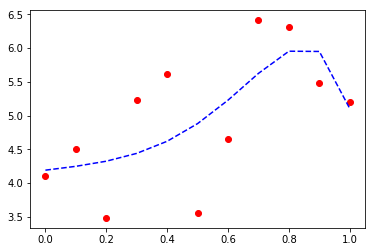

In [89]:
plt.plot(X, ynoise, 'ro')
plt.plot(X, yp, 'b--')
plt.show()

In [90]:
# check coefficients 

m.coef_

array([ 0.        ,  0.54144365,  0.        ,  2.79693633,  1.4389673 ,
        0.        , -0.        , -1.17601856, -2.43773331, -0.24978453,
       -0.        ])

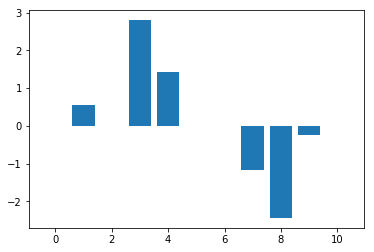

In [91]:
xx = list(range(11))

plt.bar(xx, m.coef_)
plt.show()

In [92]:
m = Lasso(alpha=0.001).fit(Xpoly, ynoise)

C:\Users\Pippo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [93]:
yp = m.predict(Xpoly)

In [94]:
m.coef_

array([ 0.        ,  0.58807202,  0.        ,  3.40671927,  0.        ,
        0.        , -0.        , -0.        , -1.50057255, -1.56044942,
       -0.        ])

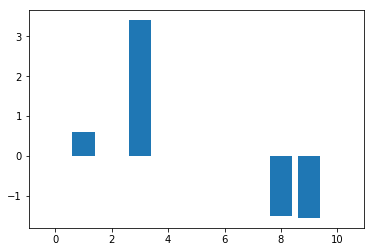

In [95]:
xx = list(range(11))

plt.bar(xx, m.coef_)
plt.show()

In [96]:
m = Lasso(alpha=0.1).fit(Xpoly, ynoise)

In [97]:
yp = m.predict(Xpoly)

In [99]:
m.coef_


array([0.        , 0.75691082, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

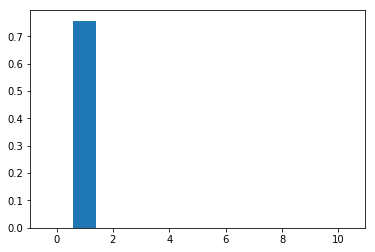

In [98]:
xx = list(range(11))

plt.bar(xx, m.coef_)
plt.show()